<a href="https://colab.research.google.com/github/kemalthoriq/car-rental-app/blob/master/sentiment_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

## Crawling Data BPJS Twitter

In [ ]:
# Crawl Data Twitter BPJS

filename = "bpjs_tweets.csv"
search_keyword = "bpjs"

limit = 1000

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} -- token

## Token Tweet : 47705bcd5b4dda8552a013d385f29339133ca7a4

⠙⠹⠸⠼⠴⠦Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › *******

## Output Data Komentar BPJS di Twitter

In [ ]:
import pandas as pd

file_path = f"tweets-data/{filename}"

df = pd.read_csv(file_path, delimiter=",")

display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1880102768578568479,Fri Jan 17 04:00:05 +0000 2025,17072,Guys dia emang mau bubarin BPJS buat kasih cel...,1880102768578568479,NaN,NaN,in,Indonesia,234,159,7841,https://x.com/1212MAonTWT/status/1880102768578...,3704082012,1212MAonTWT
1,1879503594472485348,Wed Jan 15 12:19:11 +0000 2025,2622,Peserta BPJS wajib tau https://t.co/DPvCpRqx1M,1879503594472485348,https://pbs.twimg.com/ext_tw_video_thumb/18125...,NaN,in,Indonesia,25,62,1024,https://x.com/bukanhoaxxx/status/1879503594472...,18712433,bukanhoaxxx
2,1877175313869799462,Thu Jan 09 02:07:25 +0000 2025,431,Ironi.... kaum Miskin yang setiap 5 Tahun sela...,1877175313869799462,https://pbs.twimg.com/ext_tw_video_thumb/18771...,NaN,in,I N D O N E S I A,4,37,223,https://x.com/Heraloebss/status/18771753138697...,1251824880967774208,Heraloebss
3,1879653886124069226,Wed Jan 15 22:16:23 +0000 2025,994,BIPIJIIS KATA GUA MENDING LU STANDBY DI IGD. G...,1879653886124069226,NaN,NaN,in,bumi allah,19,22,257,https://x.com/apralzolam/status/18796538861240...,1273518088521203714,apralzolam
4,1879836598491373693,Thu Jan 16 10:22:25 +0000 2025,3469,Diwajibkan pakai BPJS tapi ga bisa mengcover s...,1879836598491373693,https://pbs.twimg.com/media/GhaFa8OawAA5KU5.jpg,NaN,in,PLUIT,118,514,1274,https://x.com/KangManto123/status/187983659849...,947632364003368961,KangManto123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1878362561743065262,Sun Jan 12 08:45:07 +0000 2025,4,jog ke psikolog/psikiater tu bisa pake bpjs at...,1878362561743065262,NaN,NaN,in,SEND MENFESS LEWAT XFESS,0,6,0,https://x.com/jogjamfs/status/1878362561743065262,1106468786016649217,jogjamfs
278,1879793198870204479,Thu Jan 16 09:53:44 +0000 2025,75,@Mdy_Asmara1701 Kita bayar BPJS itu agar jika ...,1879829379146248495,NaN,Mdy_Asmara1701,in,NaN,1,4,12,https://x.com/allyazhar3/status/18798293791462...,745868994004062208,allyazhar3
279,1880352778083795149,Sat Jan 18 07:29:48 +0000 2025,0,@NM_Handayani Salam. Silakan menanyakan pada b...,1880517934717792741,NaN,NM_Handayani,in,Indonesia,0,1,0,https://x.com/BPJSKesehatanRI/status/188051793...,1522337929,BPJSKesehatanRI
280,1879914390092419126,Thu Jan 16 17:23:27 +0000 2025,227,@Balericx dongeng kisah di atas tidak akan ter...,1879942556626403724,NaN,Balericx,in,Republic of Indonesia,0,4,8,https://x.com/hapuskanpinjol/status/1879942556...,1142024817589096448,hapuskanpinjol


## Jumlah Frame Data

In [45]:
num_tweets = len(df)

print(f"Jumlah tweet dalam dataframe adalah {num_tweets}")

Jumlah tweet dalam dataframe adalah 531


Clean Text Data & Preproccessing Data

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Fungsi membersihkan teks
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    return " ".join([word for word in tokens if word not in stop_words])

# Bersihkan teks
df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Model LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Model LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 class (positif, negatif, netral)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.8409 - loss: 0.8787 - val_accuracy: 0.8505 - val_loss: 0.5292
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8218 - loss: 0.5986 - val_accuracy: 0.8505 - val_loss: 0.5257
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8550 - loss: 0.5115 - val_accuracy: 0.8505 - val_loss: 0.5342
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.8282 - loss: 0.5795 - val_accuracy: 0.8505 - val_loss: 0.5240
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8303 - loss: 0.5750 - val_accuracy: 0.8505 - val_loss: 0.5245
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8216 - loss: 0.5873 - val_accuracy: 0.8505 - val_loss: 0.5246
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.8386 - loss: 0.5539 - val_accuracy: 0.8505 - val_loss: 0.5223
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.8387 - loss: 0.5354 - val_accuracy: 0.

## Plot Akurasi & Loss Data

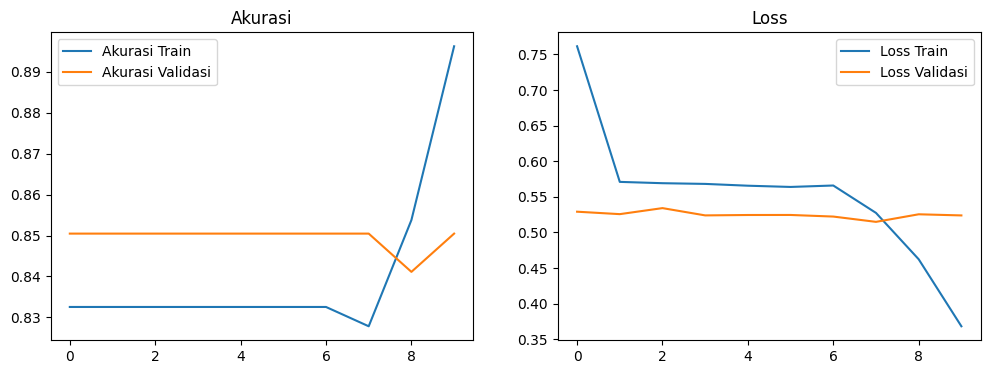

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8631 - loss: 0.4640
Akurasi: 85.05%


In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Train')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend()
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Train')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend()
plt.title('Loss')
plt.show()

# Evaluasi
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy*100:.2f}%")


## Label Data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


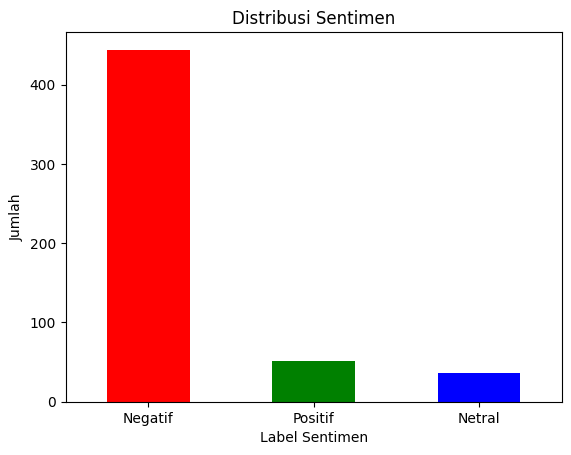

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.6538 - loss: 0.8971 - val_accuracy: 0.8505 - val_loss: 0.5249
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.8608 - loss: 0.5012 - val_accuracy: 0.8505 - val_loss: 0.5355
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8393 - loss: 0.5613 - val_accuracy: 0.8505 - val_loss: 0.5247
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8375 - loss: 0.5500 - val_accuracy: 0.8505 - val_loss: 0.5279
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8342 - loss: 0.5604 - val_accuracy: 0.8505 - val_loss: 0.5273
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         9
     Positif       0.00      0.00      0.00         7
      Netral       0.85      1.00      0.92        91

    accuracy                           0.85       107
   macro avg       0.28      0.33      0.31       107
weighted avg       0.72      0.85      0.78       107



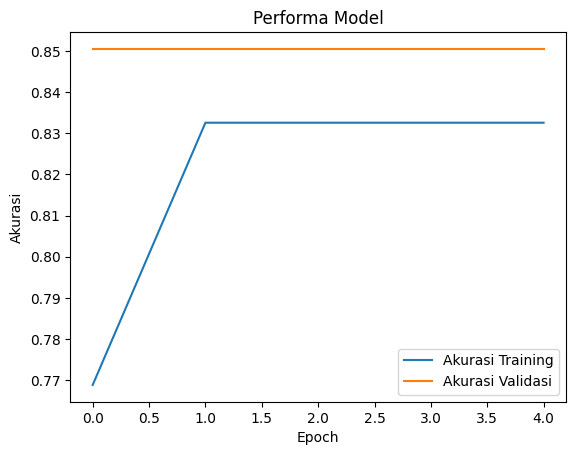

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Resource NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Fungsi Membersihkan Data
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Hapus URL
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Hapus karakter non-alphabet
    text = text.lower()  # Konversi ke lowercase
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))  # Stopword Bahasa Indonesia
    return " ".join([word for word in tokens if word not in stop_words])

# Baca File CSV
file_path = "tweets-data/bpjs_tweets.csv"  # Sesuaikan dengan path file Anda
df = pd.read_csv(file_path)

# Kolom Teks
if 'text' not in df.columns:
    if 'tweet' in df.columns:
        df.rename(columns={'tweet': 'text'}, inplace=True)
    elif 'full_text' in df.columns:
        df.rename(columns={'full_text': 'text'}, inplace=True)
    else:
        raise KeyError("Tidak ada kolom 'text', 'tweet', atau 'full_text'.")

# Bersihkan Data
df['cleaned_text'] = df['text'].apply(clean_text)

# Label Otomatis dengan Kata Kunci
def assign_label(text):
    positif_keywords = [
    "baik", "jujur", "suka", "menyenangkan", "indah", "bagus", "hebat",
    "luar biasa", "cerdas", "ramah", "murah hati", "positif", "senang",
    "bahagia", "puas", "mantap", "bersinar", "terampil", "tenang", "adil"
    ]
    negatif_keywords = negatif = [
    "bohong", "buruk", "jahat", "tidak", "jelek", "menipu", "kesal", "marah",
    "sedih", "sakit", "kecewa", "frustrasi", "malas", "gelisah", "lelah",
    "tertekan", "bermasalah", "negatif", "berantakan", "hancur", "curang"
    ]
    text = text.lower()
    if any(word in text for word in positif_keywords):
        return 1  # Positif
    elif any(word in text for word in negatif_keywords):
        return 0  # Negatif
    else:
        return 2  # Netral

df['label'] = df['cleaned_text'].apply(assign_label)

# Visualisasi Data
df['label'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribusi Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['Negatif', 'Positif', 'Netral'], rotation=0)
plt.show()

# Tokenisasi dan Padding
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])

X = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(X, maxlen=50, padding='post', truncating='post')

# Encode Label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])  # Encode ke bentuk numerik

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun Model LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output 3 kelas (Negatif, Netral, Positif)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi Model
y_pred = model.predict(X_test).argmax(axis=1)

unique_classes = np.unique(np.concatenate((y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=unique_classes, target_names=['Negatif', 'Positif', 'Netral']))

# Visualisasi Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Performa Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()
